# <font color='#000000'>The Effect of Sunlight on Water Evaporation<font><a class='anchor' id='top'></a>

### Table of Contents
    
* [1. Abstract](#chapter1)

* [2. Data Health Review](#chapter2)
	* [2.1 Importing Libraries](#chapter2.1)
	* [2.2 Importing the Data](#chapter2.2)
	* [2.3 Data Cleaning and Preprocessing](#chapter2.3)
    * [2.4 Data Statistical Summary](#chapter2.4)

* [3. Exploratory Data Analysis](#chapter3)
	* [3.1 Data Frequency Understanding](#chapter3.1)
	* [3.2 Univariate Analysis](#chapter3.2)
        * [3.2.1 Treatment of Outliers](#chapter3.2.1)
	* [3.3 Bivariate Analysis](#chapter3.3)
	
* [4. Spliting the data and Fitting the Model](#chapter4)

* [5. Reading Using SKLearn and Statsmodel Metrics](#chapter5)

* [6. Conclusion](#chapter6)

## 1. Abstract  <a class="anchor" id="chapter1"></a>


This paper presents an investigation into the effects of sunlight on water evaporation over a period of 39 days. The experiment involved placing a glass of water in direct sunlight and measuring the amount of water evaporated twice a day. Additionally, the average temperature of each day was recorded. The objective was to examine the relationship between temperature and water evaporation and determine if a direct correlation exists.

The results of the experiment revealed that there is no direct relationship between temperature and water evaporation. Surprisingly, the findings showcased that days with higher temperatures did not necessarily result in increased water evaporation, and vice versa. This implies that factors other than temperature may significantly influence the rate of water evaporation under sunlight exposure.

To further investigate the relationship between temperature and water evaporation, a correlation matrix was constructed. The analysis indicated a positive correlation between the two variables, albeit with varying degrees of strength. However, when employing linear regression predictive modeling, the relationship was found to be relatively weak.

These findings highlight the complex nature of water evaporation and suggest that temperature alone may not be the sole determinant of evaporation rates under sunlight exposure. Further research is needed to explore the additional factors that could contribute to the observed variations in water evaporation and to develop more accurate predictive models.

**Keywords:** sunlight, water evaporation, temperature, correlation matrix, linear regression, predictive modeling.


## 2. Data Health Review <a class= "anchor" id = "chapter2"></a>

###  2.1 Importing Libraries <a class = "anchor" id = "chapter2.1"></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Importing the Data <a class = "anchor" id = "chapter2.2"></a>

In [3]:
df = pd.read_excel('The Effect of Sunlight on Water Evaporation.xlsx')
df.head(5)

,Date,From (in ml),To (in ml),Difference (in ml),Temperature (in °C)
0,2023-03-14,400,370,30,25
1,2023-03-15,400,380,20,21
2,2023-03-16,400,370,30,23
3,2023-03-17,400,390,10,21
4,2023-03-18,400,380,20,23


## 2.3 Data Cleaning and Preprocessing <a class= "anchor" id = "chapter2.3"></a>

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 39 non-null     datetime64[ns]
 1   From (in ml)         39 non-null     int64         
 2   To (in ml)           39 non-null     int64         
 3   Difference (in ml)   39 non-null     int64         
 4   Temperature (in °C)  39 non-null     int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.6 KB


In [5]:
# renaming the names of column to make it more 
df.rename(columns = {'From (in ml)':'Water@9am_ml','To (in ml)':'Water@8pm_ml','Difference (in ml)':'Diff_ml','Temperature (in °C)':'Temp_C'}, inplace = True)
df.head(3)

,Date,Water@9am_ml,Water@8pm_ml,Diff_ml,Temp_C
0,2023-03-14,400,370,30,25
1,2023-03-15,400,380,20,21
2,2023-03-16,400,370,30,23


In [6]:
df.isnull().sum()

Date            0
Water@9am_ml    0
Water@8pm_ml    0
Diff_ml         0
Temp_C          0
dtype: int64

## 2.4 Data Statistical Summary <a class = "anchor" id = "chapter2.4"></a>

In [7]:
df.describe()

,Water@9am_ml,Water@8pm_ml,Diff_ml,Temp_C
count,39.0,39.000000,39.000000,39.000000
mean,400.0,348.461538,51.538462,33.615385
std,0.0,26.009964,26.009964,5.402803
min,400.0,290.000000,10.000000,21.000000
25%,400.0,335.000000,35.000000,33.000000
50%,400.0,350.000000,50.000000,35.000000
75%,400.0,365.000000,65.000000,37.000000
max,400.0,390.000000,110.000000,39.000000


# 3. Exploratory Data Analysis

## 3.1 Data Frequency Understanding <a class = "anchor" id = "chapter3.1"></a>

In [8]:
for i in df.columns:
    nunique = df[i].nunique()
    print('The nunique feature in '+ i + 'is: ', nunique)

The nunique feature in Dateis:  39
The nunique feature in Water@9am_mlis:  1
The nunique feature in Water@8pm_mlis:  11
The nunique feature in Diff_mlis:  11
The nunique feature in Temp_Cis:  11


## 3.2 Univariate Analysis <a class = "anchor" id = "chapter3.2"></a>

In [9]:
df.columns

Index(['Date', 'Water@9am_ml', 'Water@8pm_ml', 'Diff_ml', 'Temp_C'], dtype='object')

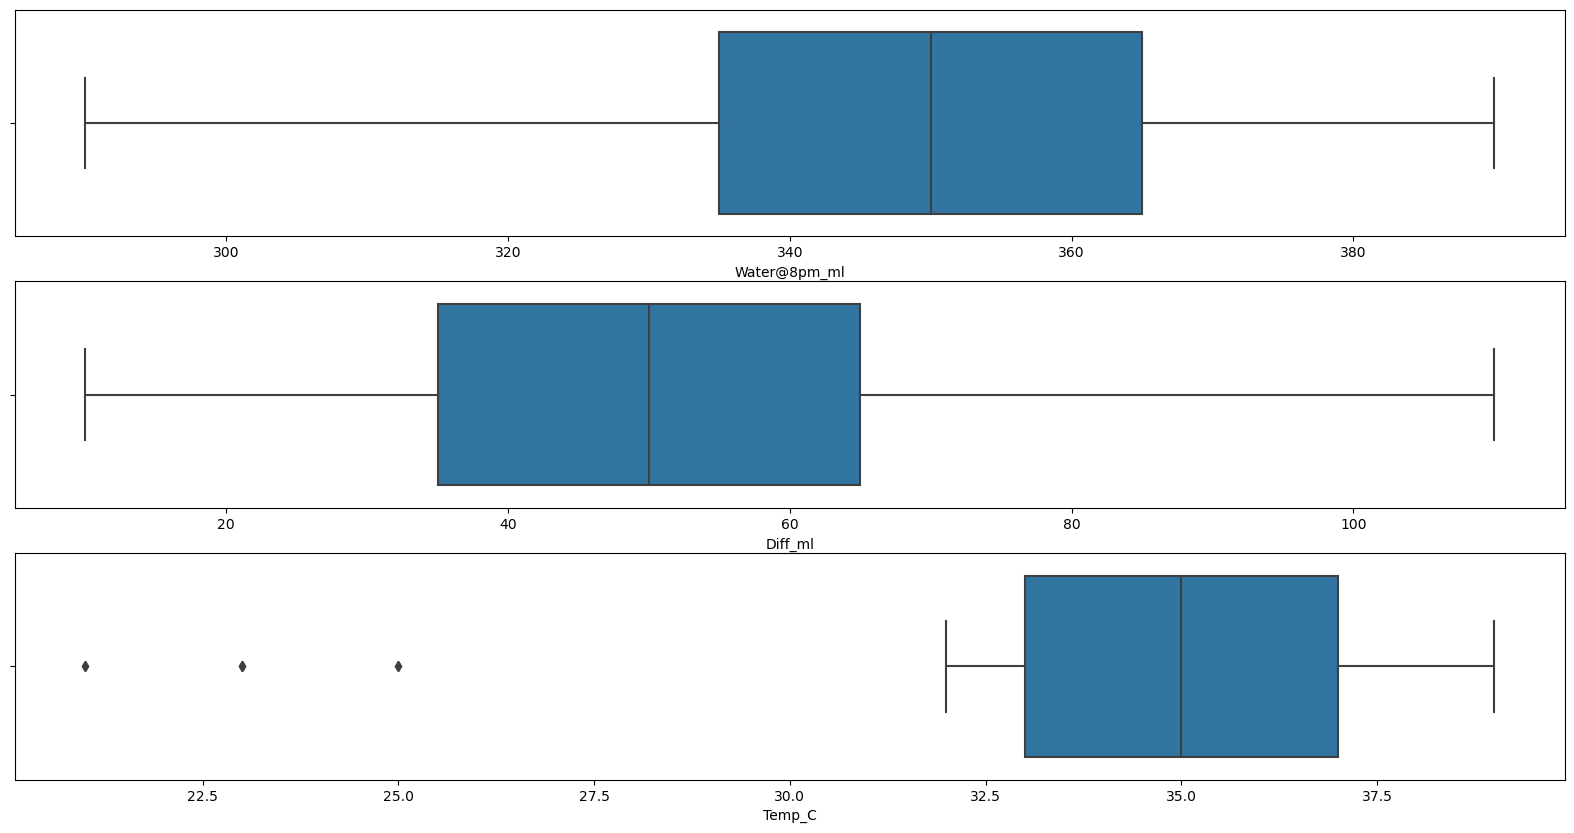

In [10]:
plt.figure(figsize = (20,10))

plt.subplot(3,1,1)
sns.boxplot(data = df, x = 'Water@8pm_ml')

plt.subplot(3,1,2)
sns.boxplot(data = df, x = 'Diff_ml')

plt.subplot(3,1,3)
sns.boxplot(data = df, x = 'Temp_C')

plt.show()

### 3.2.1 Treatment of Outliers <a class = "anchor" id = "chapter3.2.1"></a>

In [11]:
df[df['Temp_C']<30]

,Date,Water@9am_ml,Water@8pm_ml,Diff_ml,Temp_C
0,2023-03-14,400,370,30,25
1,2023-03-15,400,380,20,21
2,2023-03-16,400,370,30,23
3,2023-03-17,400,390,10,21
4,2023-03-18,400,380,20,23
5,2023-03-19,400,390,10,23
6,2023-03-20,400,360,40,25


In [12]:
# Retaining the outliers 

## 3.3 Bivariate Analysis <a class = "anchor" id = "chapter3.3" ></a> 

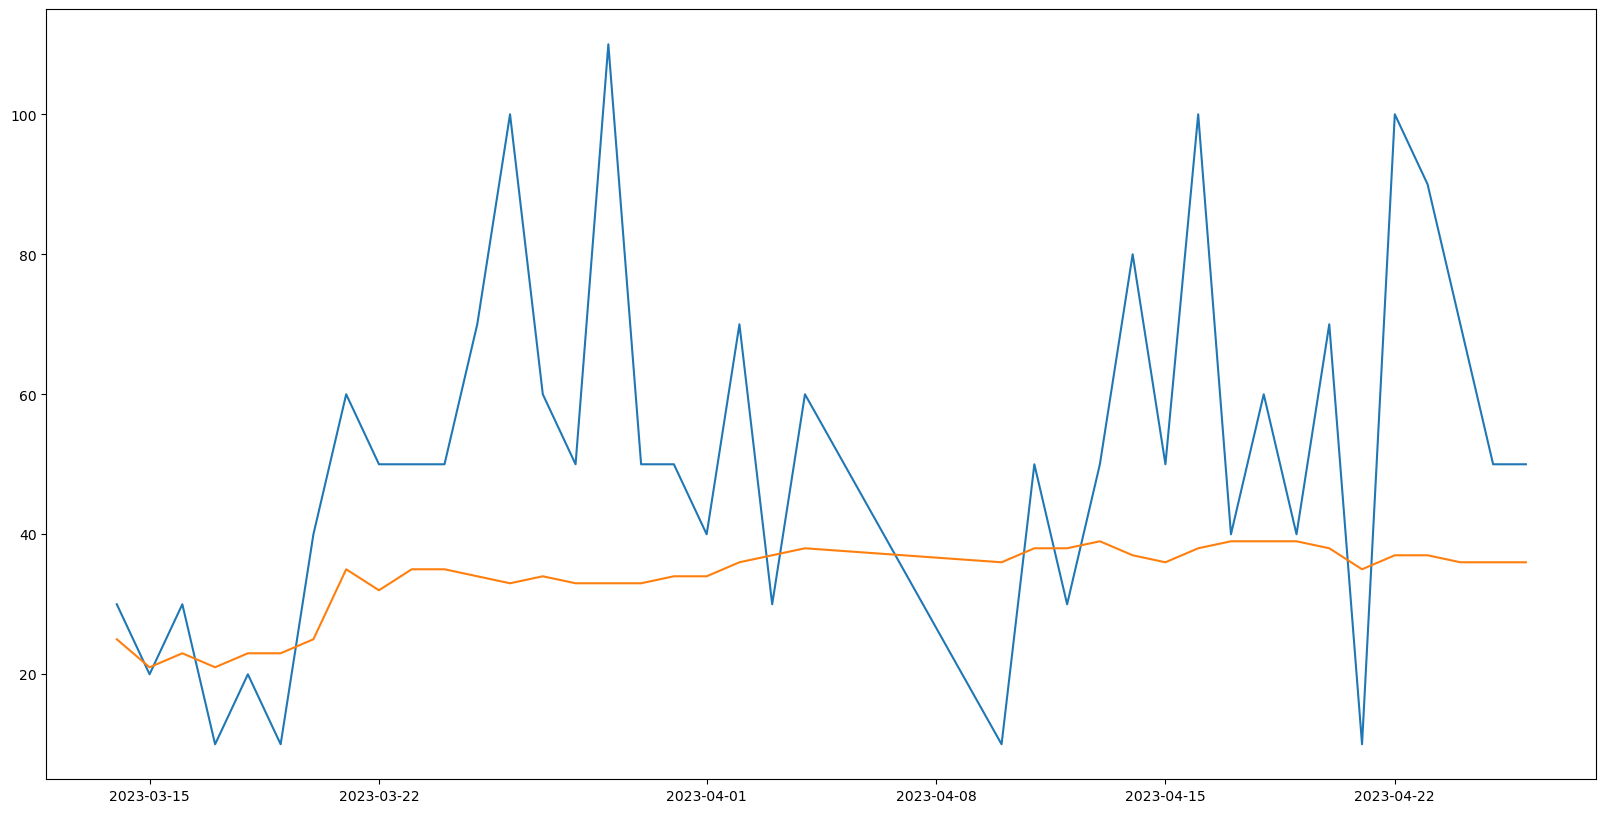

In [13]:
plt.figure(figsize = (20,10))

plt.plot(df['Date'], df['Diff_ml'])
plt.plot(df['Date'], df['Temp_C'])

plt.show()

<Axes: >

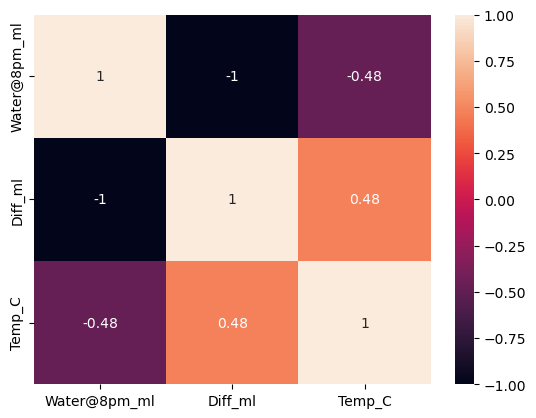

In [14]:
sns.heatmap(df[['Water@8pm_ml', 'Diff_ml', 'Temp_C']].corr(), annot = True)

## 4. Spliting the data and Fitting the Model <a class = "anchor" id = "chapter4"> </a>

###  Using Simple Linear Regression to find the relation between the Difference in water evaporation and Temperature

In [15]:
df.head(2)

,Date,Water@9am_ml,Water@8pm_ml,Diff_ml,Temp_C
0,2023-03-14,400,370,30,25
1,2023-03-15,400,380,20,21


In [16]:
X = df['Diff_ml']
y = df['Temp_C']

In [17]:
# Spliting the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .8, random_state = 25)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [18]:
# Fitting the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
predict = lr.predict(X_test)
predict.shape

(8, 1)

In [20]:
y_test

array([[36],
       [37],
       [25],
       [34],
       [34],
       [36],
       [35],
       [38]], dtype=int64)

In [21]:
predict

array([[35.45565571],
       [38.41465542],
       [32.496656  ],
       [35.45565571],
       [32.496656  ],
       [33.48298924],
       [33.48298924],
       [34.46932248]])

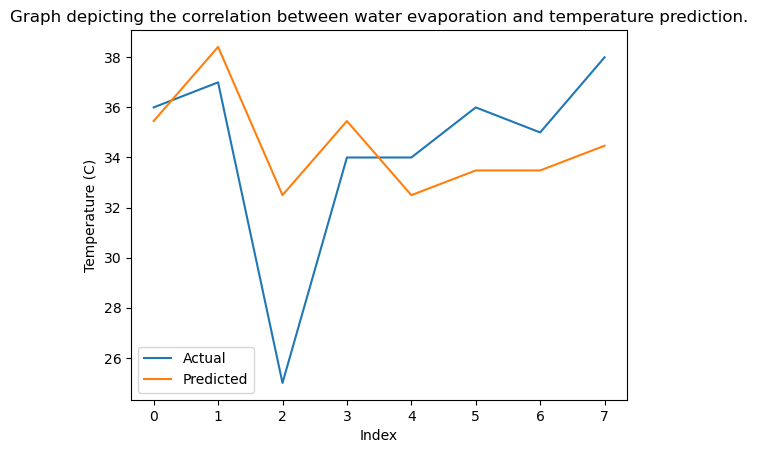

In [22]:
x_range = [x for x in range(len(predict))]

plt.xlabel('Index')
plt.ylabel('Temperature (C)')

plt.plot(x_range, y_test)
plt.plot(x_range, predict)

plt.legend(['Actual', 'Predicted'])

plt.title('Graph depicting the correlation between water evaporation and temperature prediction.')
plt.show();

## 5. Reading Using SKLearn and Statsmodel Metrics <a class= "anchor" id = "chapter5"></a>

In [ ]:
# Using Sklearn Metrics to get the score

from sklearn import metrics

print('The r2_score for the given data:: ', round(metrics.r2_score(y_test, predict),2))
print('The mean_squared_error for the given data:: ', round(metrics.mean_squared_error(y_test, predict),2))

In [ ]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

In [ ]:
# using statsmodels to get the score
import statsmodels.formula.api as smf

result = smf.ols(formula = 'Temp_C ~ Diff_ml', data = df).fit()

print(result.summary())

# Using K Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
get_score(lr, X_train, X_test, y_train, y_test)

## 6. Conclusion <a class = "anchor" id = "chapter6"> </a>

These findings highlight the complex nature of water evaporation and suggest that temperature alone may not be the sole determinant of evaporation rates under sunlight exposure. Further research is needed to explore the additional factors that could contribute to the observed variations in water evaporation and to develop more accurate predictive models.

In [ ]:
print('*'*100)

_by_

_Ar. Kirthi Chandra_ 

_Mitali 19091AA008_

# Thank You